In [24]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#for the addional queries
%matplotlib inline
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()


In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_temps_list, columns=['june temps'])
df

,june temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()


,june temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


(0.0, 400.0)

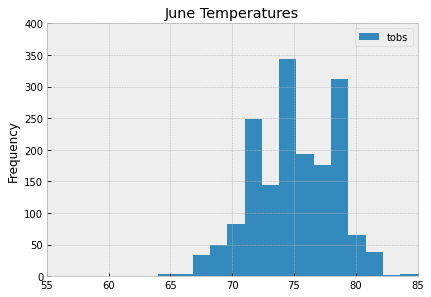

In [25]:
june_temp_df = pd.DataFrame(june_temps_list, columns=['tobs'])
june_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

# average is around 75

## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
december_temps_list = [temp.tobs for temp in december_temps]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(december_temps_list, columns=['december temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,december temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 400.0)

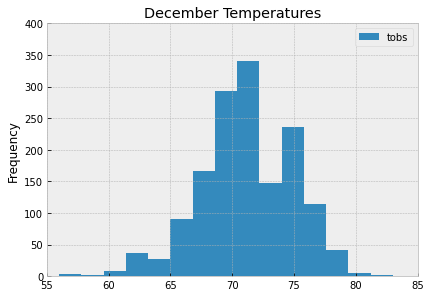

In [26]:
dec_temp_df = pd.DataFrame(december_temps_list, columns=['tobs'])
dec_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,400])

# average is around 71

# D:3 Extra Additional Queries

In [12]:
#june month with preciptions and temps.

june_prcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

june_prcp=list((june_prcp_temp))

juneprcptemp_df = pd.DataFrame(june_prcp,columns=['date','June Precip','June Temps'])

juneprcptemp_df.set_index(juneprcptemp_df['date'],inplace=True)

juneprcptemp_df.describe()

,June Precip,June Temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [13]:
# december month with preciptions and temps.

dec_prcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

dec_prcp=list((dec_prcp_temp))

decprcptemp_df = pd.DataFrame(dec_prcp,columns=['date','December Precip','December Temps'])

decprcptemp_df.set_index(decprcptemp_df['date'],inplace=True)

decprcptemp_df.describe()

,December Precip,December Temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000
